<a href="https://colab.research.google.com/github/C110181106/NKUST_C110181106/blob/main/%E4%B9%B3%E7%99%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

到目前為止我們已經介紹好幾種最常用的機器學習演算法。接下來我們想介紹的是，如何比較每一種演算法的好壞。先請教各位一個問題：今天如果我們要證明A同學的成績比B同學好。我們要用一次考試的成績還是用三次考試的成績會比較客觀？答案當然是，次數越多愈客觀。這就是交叉驗證的主要精神：透過讓機器學習多次的學習和預測取平均，來判斷哪一個比較好。

## 1 載入資料
本章所使用的資料是來自於sklearn內建的資料，其資料來源是從威斯康辛(Wisconsin)大學醫院收集乳癌腫瘤之病患。乳癌是目前十大癌症死因之一，如果能透過機器自動學習來判斷患者是否為乳癌病患，將是科技運用在醫學的一項推進。資料的創立者是Dr. William H. Wolberg, W. Nick Street和 Olvi L. Mangasarian。資料創建日期是1995年。資料是透過探針去收集腫瘤的資訊(Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass)。資料內有212筆是惡性，357是良性腫瘤，共569筆資料。

範例： 用DESCR來了解資料的來龍去脈  
共569筆樣本，含30個數值型的特徵值。

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## plt.rcParams['font.sans-serif'] = ['DFKai-sb']
## plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

print('\n'.join(breast_cancer['DESCR'].split('\n')[:15]))

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter


範例： 資料的特徵值  
資料裡一共有30個特徵值，相當多。不過由於我們不是醫療背景，對這些專有名詞的了解就無法太深入。

In [ ]:
print(breast_cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
df = pd.DataFrame(data = breast_cancer['data'], columns = breast_cancer['feature_names'])
df['target'] = breast_cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

範例： 觀察目標值  
0是惡性，1是良性。約3成7是惡性，約6成2是良性腫瘤。如果是盲猜(都猜是良性)的話，正確率能夠有6成。這裡要注意一下，習慣上我們編碼是0是良性1是惡性，但在本例0反而是惡性腫瘤。

In [ ]:
print(f'標籤0為{breast_cancer["target_names"][0]}，是惡性腫瘤的意思')
print(df['target'].value_counts(normalize=True))

標籤0為malignant，是惡性腫瘤的意思
target
1    0.627417
0    0.372583
Name: proportion, dtype: float64


In [ ]:
# sns.pairplot(df, vars=['mean radius','mean texture','mean perimeter','mean area'],
             # hue='target', size=2);

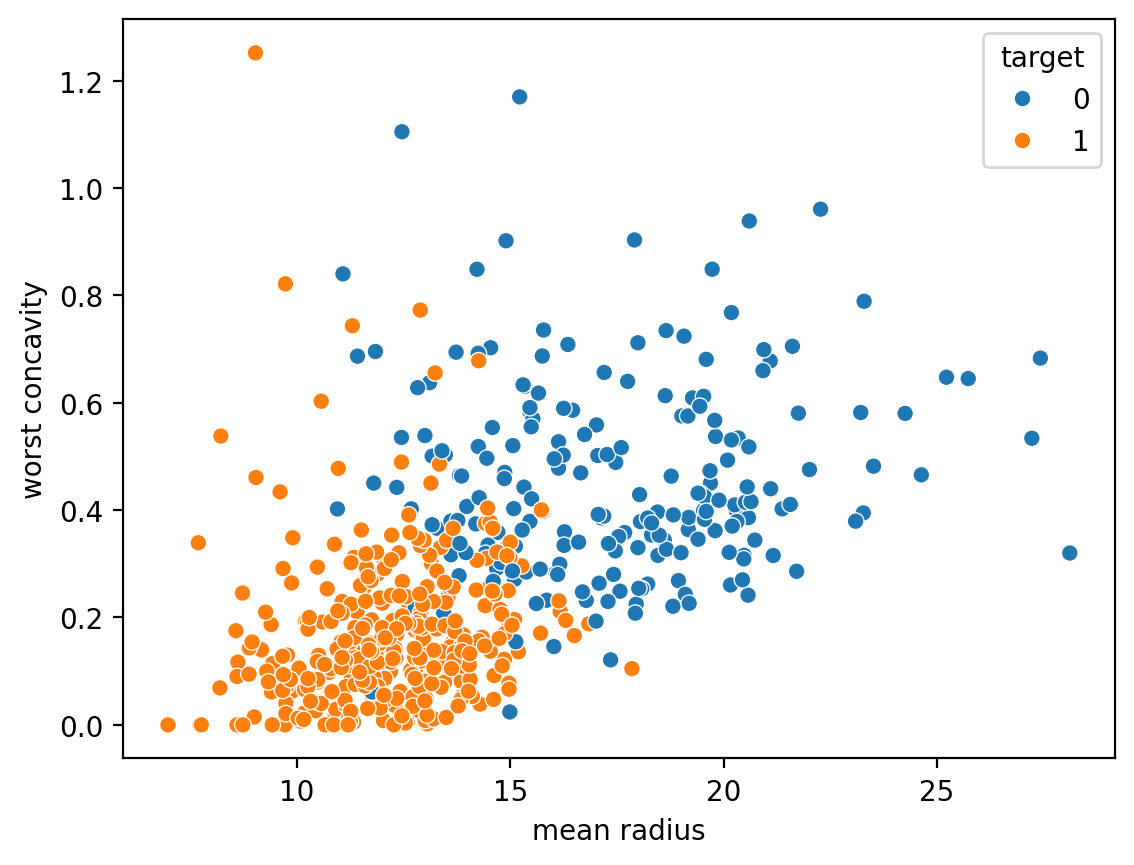

In [ ]:
sns.scatterplot(x='mean radius', y='worst concavity', data=df, hue='target');

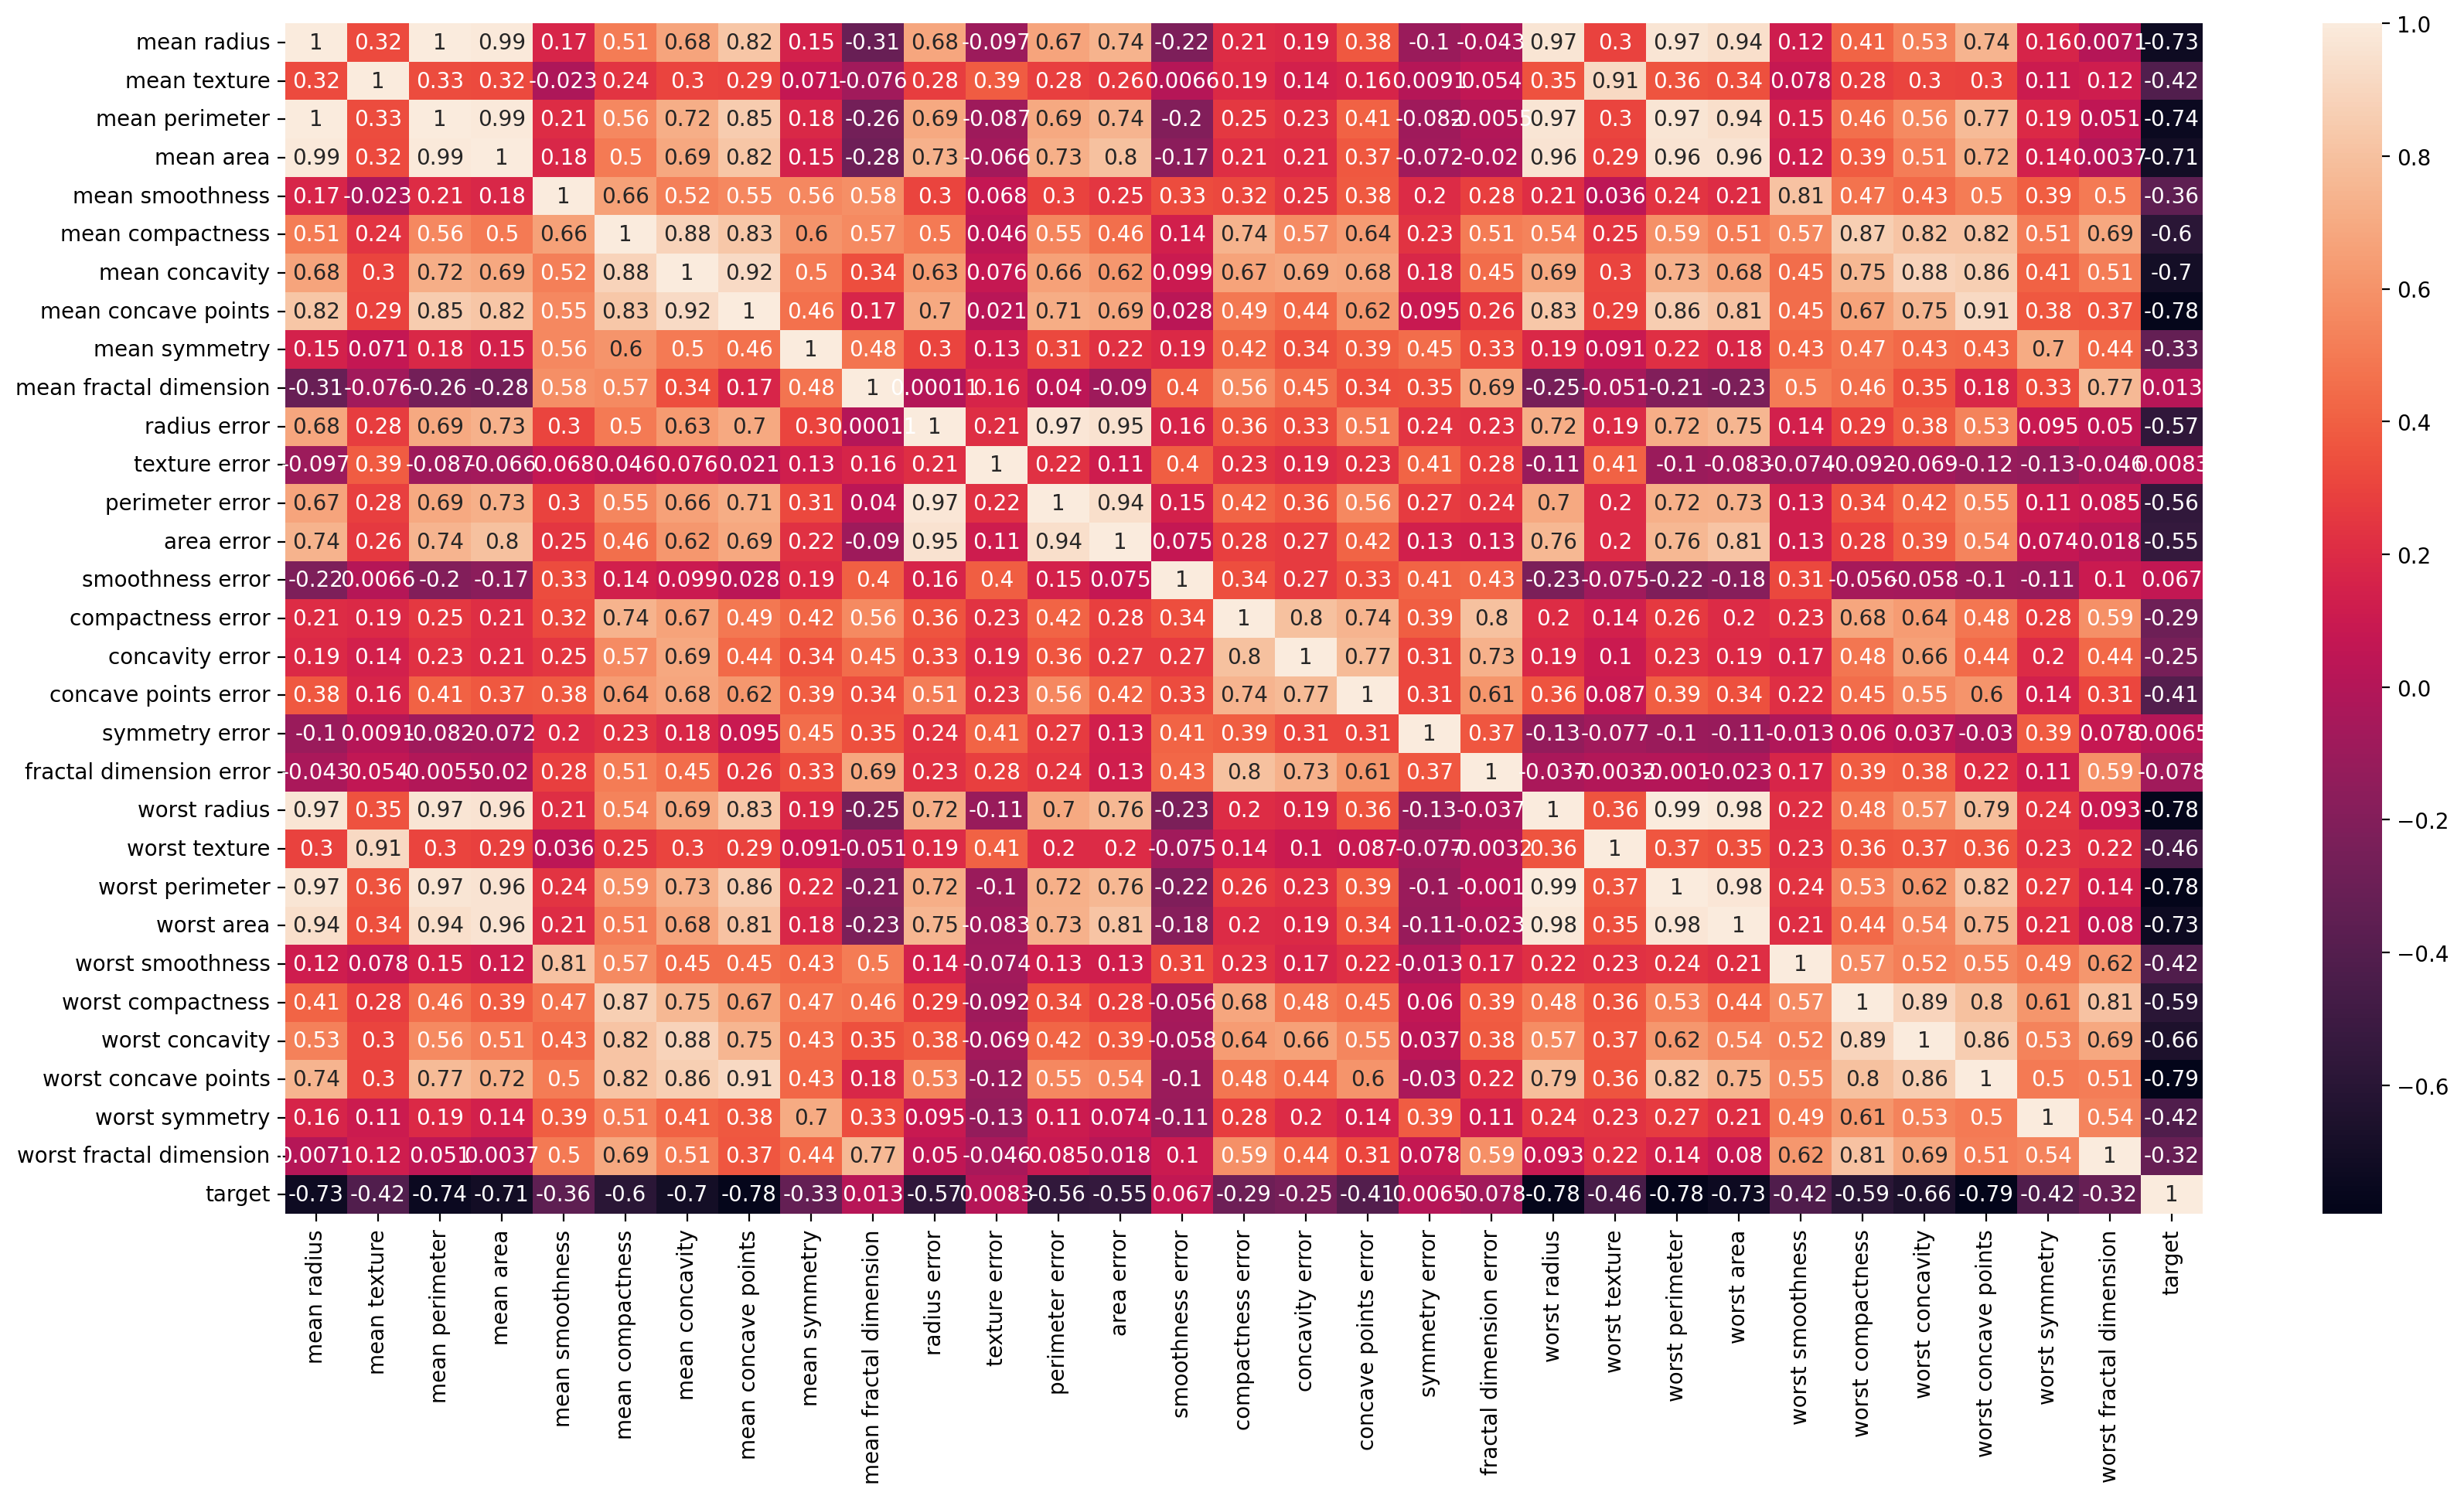

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);

In [ ]:
df.corr()['target']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

In [ ]:
X_cols = df.columns.drop('target')
X = df[X_cols]
y = df['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = [LogisticRegression(), SVC(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(max_depth=5)]
scores = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    model_pl.fit(X_train, y_train)
    score = model_pl.score(X_test, y_test)
    scores[model.__class__.__name__] = score
scores

{'LogisticRegression': 0.9787234042553191,
 'SVC': 0.9680851063829787,
 'KNeighborsClassifier': 0.9574468085106383,
 'DecisionTreeClassifier': 0.925531914893617}

In [ ]:
pd.Series(scores).sort_values(ascending=False)

LogisticRegression        0.978723
SVC                       0.968085
KNeighborsClassifier      0.957447
DecisionTreeClassifier    0.925532
dtype: float64

In [ ]:
from sklearn.model_selection import KFold
data = np.arange(10,18)
kfold = KFold(n_splits=4)
for train_idx, test_idx in kfold.split(data):
    print(f'訓練集資料: {data[train_idx]}， 測試集資料:{data[test_idx]}')

訓練集資料: [12 13 14 15 16 17]， 測試集資料:[10 11]
訓練集資料: [10 11 14 15 16 17]， 測試集資料:[12 13]
訓練集資料: [10 11 12 13 16 17]， 測試集資料:[14 15]
訓練集資料: [10 11 12 13 14 15]， 測試集資料:[16 17]


In [ ]:
kfold = KFold(n_splits=5)
model_pl_lr = make_pipeline(StandardScaler(), LogisticRegression())
scores = []
for train_idx, test_idx in kfold.split(X_train, y_train):
    model_pl_lr.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    scores.append(model_pl_lr.score(X_train.iloc[test_idx], y_train.iloc[test_idx]))
print(f'5折交叉驗證的結果{np.mean(scores)}')

5折交叉驗證的結果0.97634996582365


In [ ]:
from sklearn.model_selection import cross_val_score
model_pl_lr = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(model_pl_lr, X_train, y_train, scoring='accuracy', cv=5)
print(f'5折交叉驗證的每次結果 {scores}')
print(f'5折交叉驗證的平均結果{np.mean(scores)}')

5折交叉驗證的每次結果 [0.98701299 0.97368421 1.         0.96052632 0.96052632]
5折交叉驗證的平均結果0.97634996582365


In [ ]:
scores = cross_val_score(model_pl_lr, X_train, y_train, scoring='recall', cv=5)
print(f'5折交叉驗證的每次結果 {scores}')
print(f'5折交叉驗證的平均結果{np.mean(scores)}')

5折交叉驗證的每次結果 [1.         1.         1.         1.         0.95744681]
5折交叉驗證的平均結果0.9914893617021276


In [ ]:
models = [LogisticRegression(), SVC(),
          KNeighborsClassifier(), DecisionTreeClassifier(max_depth=10)]
scores = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    score = cross_val_score(model_pl, X_train, y_train, scoring='accuracy', cv=10)
    scores[model.__class__.__name__] = score.mean()
pd.Series(scores).sort_values(ascending=False)

LogisticRegression        0.976316
SVC                       0.971053
KNeighborsClassifier      0.965857
DecisionTreeClassifier    0.915857
dtype: float64

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# model_pl_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_pl_lr = make_pipeline(StandardScaler(), SVC())
model_pl_lr.fit(X_train, y_train)
y_pred = model_pl_lr.predict(X_test)
print('正確率：', accuracy_score(y_test, y_pred).round(3))
print('混亂矩陣')
print(confusion_matrix(y_test, y_pred))
print('綜合報告')
print(classification_report(y_test, y_pred))

正確率： 0.968
混亂矩陣
[[ 65   2]
 [  4 117]]
綜合報告
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.98      0.97      0.97       121

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [ ]:
model_tree = DecisionTreeClassifier(max_depth=10)
model_tree.fit(X_train, y_train)
pd.Series(model_tree.feature_importances_,
            index=X.columns).sort_values(ascending=False).head()

mean concave points    0.723194
worst perimeter        0.056358
worst texture          0.043807
worst radius           0.033358
worst concavity        0.031858
dtype: float64

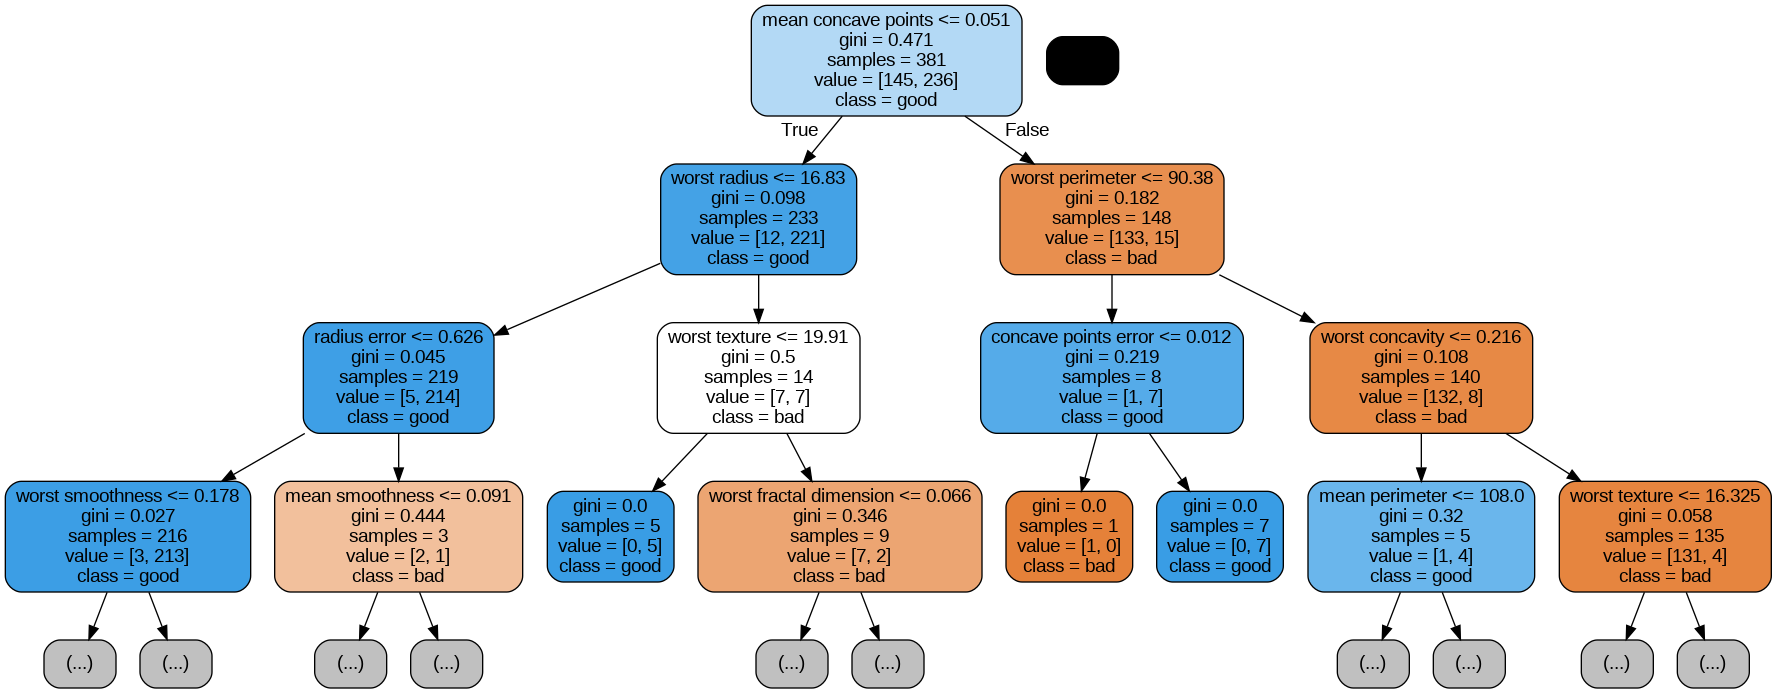

In [ ]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

features = X.columns
class_names = ['bad', 'good']
dot_data = export_graphviz(model_tree, out_file=None,
                           feature_names=features,
                           class_names = class_names,
                           proportion = False,
                           max_depth=3,
                           filled=True,
                           rounded=True)

graph = pydot.graph_from_dot_data(dot_data)
graph[0].write_png('tumor.png')
Image(graph[0].create_png(), width=800)

# Example for regression task

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100



In [ ]:
# 生成範例數據
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # 獨立變數
y = 2.5 * X.flatten() + np.random.randn(100) * 2  # 目標變數

# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# 訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 計算評估指標
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
smape = symmetric_mean_absolute_percentage_error(y_test, y_pred)

# 打印結果
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')
print(f'Symmetric Mean Absolute Percentage Error (SMAPE): {smape}')

Mean Squared Error (MSE): 3.671012987885716
Root Mean Squared Error (RMSE): 1.915988775511411
R^2 Score: 0.896480483165161
Mean Absolute Percentage Error (MAPE): 27.714819342949383
Symmetric Mean Absolute Percentage Error (SMAPE): 18.666531311605222
